<a href="https://colab.research.google.com/github/drm69/CM_PCVK/blob/main/CM_Batik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bagian A – Observasi & Eksperimen

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1. Tampilkan histogram tiap citra dan analisis distribusi intensitasnya.

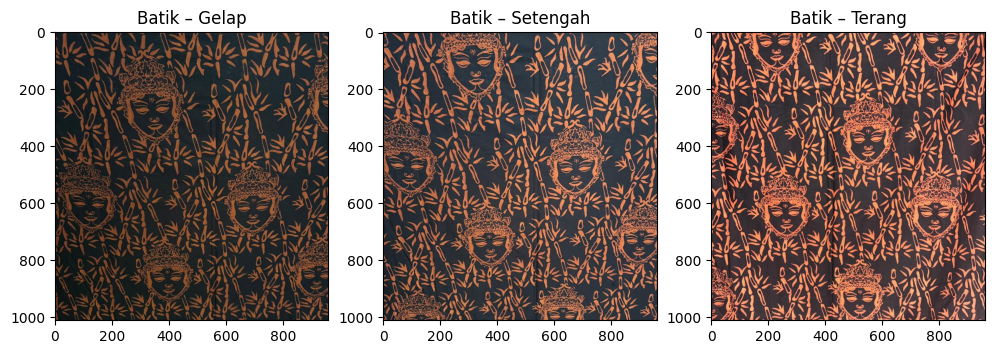

In [6]:
import cv2
import matplotlib.pyplot as plt

# Membaca 3 citra batik (gelap, setengah, terang)
img_gelap = cv2.imread('/content/drive/MyDrive/UTS_PCVK/gelap.jpg')
img_setengah = cv2.imread('/content/drive/MyDrive/UTS_PCVK/setengah.jpg')
img_terang = cv2.imread('/content/drive/MyDrive/UTS_PCVK/terang.jpg')

# Konversi BGR → RGB untuk tampilan di matplotlib
img_gelap_rgb = cv2.cvtColor(img_gelap, cv2.COLOR_BGR2RGB)
img_setengah_rgb = cv2.cvtColor(img_setengah, cv2.COLOR_BGR2RGB)
img_terang_rgb = cv2.cvtColor(img_terang, cv2.COLOR_BGR2RGB)

# Tampilkan semua citra
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img_gelap_rgb); plt.title("Batik – Gelap")
plt.subplot(1,3,2); plt.imshow(img_setengah_rgb); plt.title("Batik – Setengah")
plt.subplot(1,3,3); plt.imshow(img_terang_rgb); plt.title("Batik – Terang")
plt.show()


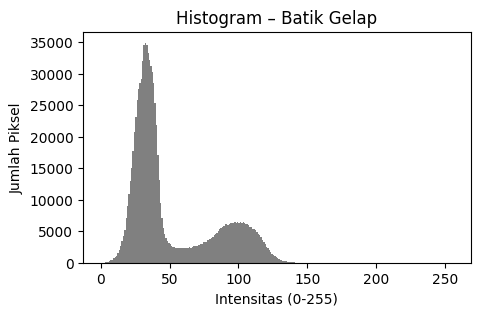

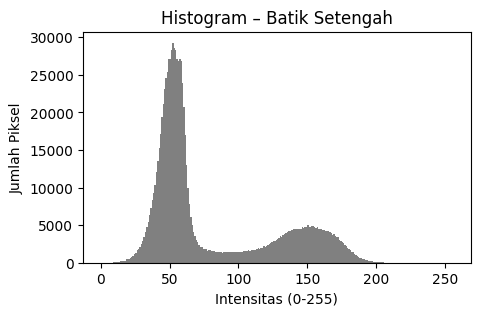

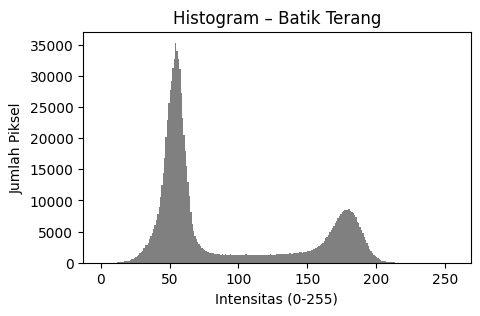

In [7]:
# Pastikan citra sudah dibaca dan dikonversi ke grayscale
gray_gelap = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/UTS_PCVK/gelap.jpg'), cv2.COLOR_BGR2GRAY)
gray_setengah = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/UTS_PCVK/setengah.jpg'), cv2.COLOR_BGR2GRAY)
gray_terang = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/UTS_PCVK/terang.jpg'), cv2.COLOR_BGR2GRAY)

# Fungsi untuk menampilkan histogram
def tampil_histogram(img_gray, judul):
    plt.figure(figsize=(5,3))
    plt.title(judul)
    plt.xlabel("Intensitas (0-255)")
    plt.ylabel("Jumlah Piksel")
    plt.hist(img_gray.ravel(), bins=256, range=(0,256), color='gray')
    plt.show()

# Menampilkan histogram untuk tiap citra batik
tampil_histogram(gray_gelap, "Histogram – Batik Gelap")
tampil_histogram(gray_setengah, "Histogram – Batik Setengah")
tampil_histogram(gray_terang, "Histogram – Batik Terang")

| Citra                                    | Ciri Histogram                                              | Analisis Distribusi                                                                                                                                                                                                                                       |
| ---------------------------------------- | ----------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Batik Gelap**                          | Histogram terkonsentrasi di sisi **kiri (0–80)**            | Ini menandakan bahwa mayoritas piksel memiliki intensitas rendah → pencahayaan kurang. Motif batik sulit terlihat dengan jelas. Solusinya adalah meningkatkan **brightness** (geser histogram ke kanan) dan **contrast** (rentang intensitas diperlebar). |
| **Batik Setengah (Cahaya Tidak Merata)** | Histogram menyebar dari **40–180**, tapi ada **dua puncak** | Adanya dua puncak menunjukkan **pencahayaan tidak merata** (bagian gelap & terang dalam satu gambar). Ini umum jika sumber cahaya hanya dari satu sisi. Diperlukan kombinasi peningkatan kontras dan teknik normalisasi agar distribusi lebih seimbang.   |
| **Batik Terang**                         | Histogram lebih rata, banyak piksel di **rentang 100–220**  | Gambar ini punya pencahayaan relatif baik. Motif batik terlihat jelas karena distribusi intensitas cukup tinggi. Tapi karena sebagian piksel ada di rentang terang, perlu sedikit koreksi kontras agar tidak overexposed di bagian putih atau highlight.  |


###2. Terapkan transformasi brightness dan contrast (linear/log brightness).
a. Tentukan nilai b (brightness) dan a (contrast) yang sesuai agar data
tampak natural seperti data asli.

###3. Lakukan histogram equalization untuk memperbaiki sebaran kontras.
a. Bandingkan hasil visual dan histogram sebelum–sesudah.

b. Perhatikan apakah motif dan detail kain lebih terlihat jelas.

c. Pastikan tekstur daun atau permukaan sayur menjadi lebih terlihat.

###4. Terapkan filter spasial:
a. Low-pass filter untuk menghaluskan noise atau tekstur berlebih pada
permukaan kain, untuk menghaluskan noise pada permukaan atau
bayangan di sekitar sayur.

b. High-pass atau Laplacian filter untuk menajamkan tepi motif batik atau untuk menajamkan tepi daun, batang, atau detail tekstur pada sayur.

###5. Implementasikan Floyd–Steinberg Dithering untuk menurunkan kedalaman warna sesuai data anda (bit-depth 4–6 bit), lalu analisis bagaimana efeknya terhadap kehalusan gradasi warna motif batik setelah reduksi warna dilakukan atau terhadap detail warna alami sayur
